In [7]:
import pandas as pd
import joblib
import logging



In [8]:

# Function to simulate adjustments for normal lifetime increase mode
def apply_normal_lifetime_increase_settings():
    settings = {
        'spin_down_timeout': 30,  # Spin-down after 30 minutes of inactivity
        'apm_value': 200,         # Moderate power management
        'aam_value': 192,         # Moderate acoustic management
        'temperature_threshold': 55,  # Throttle performance at 55°C to reduce heat stress
        'write_caching': 'priority_random',  # Prioritize caching random writes
    }
    return settings

# Function to simulate adjustments for critical mode
def apply_critical_mode_settings():
    settings = {
        'spin_down_timeout': 5,   # Spin-down after 5 minutes of inactivity
        'apm_value': 128,         # Aggressive power management
        'aam_value': 128,         # Quiet and slow seeks to reduce stress
        'temperature_threshold': 50,  # Throttle performance at 50°C to avoid heat damage
        'write_caching': 'minimal',  # Minimize write caching to avoid frequent writes
    }
    return settings

# Function to apply default settings for healthy drives
def apply_default_settings():
    settings = {
        'spin_down_timeout': 60,  # Spin-down after 60 minutes of inactivity
        'apm_value': 254,         # Minimal power management
        'aam_value': 254,         # Fast, louder seeks for performance
        'temperature_threshold': 60,  # Throttle performance at 60°C
        'write_caching': 'all',  # Cache all writes
    }
    return settings

# Function to generate a .txt file content for drive configuration
def generate_txt_config(settings, drive_num):
    config_text = f"Configuration for Drive {drive_num}:\n"
    config_text += f"Spin-down Timeout: {settings['spin_down_timeout']} minutes\n"
    config_text += f"APM Value: {settings['apm_value']}\n"
    config_text += f"AAM Value: {settings['aam_value']}\n"
    config_text += f"Temperature Threshold: {settings['temperature_threshold']} °C\n"
    config_text += f"Write Caching: {settings['write_caching']}\n"
    return config_text

# Function to predict time to failure and generate settings for each drive
def predict_ttf_and_generate_configs(test_df):
    loaded_model = joblib.load('model2.pkl')  # Load pre-trained model
    all_settings = []  # List to store all settings

    print("### Processing drives...")

    for index, row in test_df.iterrows():
        row_df = pd.DataFrame([row])  # Convert row to DataFrame
        y_pred = loaded_model.predict(row_df)  # Predict time to failure
        predicted_time = y_pred[0]

        # Determine the action to take based on the prediction
        normal_threshold = 200  # Days for normal mode
        critical_threshold = 80  # Days for critical mode

        if predicted_time < critical_threshold:
            settings = apply_critical_mode_settings()
            status = "critical"
        elif predicted_time < normal_threshold:
            settings = apply_normal_lifetime_increase_settings()
            status = "preventative measures"
        else:
            settings = apply_default_settings()
            status = "healthy"

        settings_summary = {
            'Drive': index + 1,
            'Predicted_TTF': predicted_time,
            'Status': status,
            'Settings': settings
        }

        all_settings.append(settings_summary)

    # Create a DataFrame from the summary settings
    settings_df = pd.DataFrame(all_settings)

    # Add a message to inform how many drives were processed
    print(f"{len(test_df)} drives have been processed.")

    return settings_df

def find_problem_smart_data(final_settings_df):
    return 0


In [9]:
import pandas as pd

uploaded_file = 'test_hdds.csv'  # File path to the CSV file
test_df = pd.read_csv(uploaded_file)



In [11]:
final_settings_df = predict_ttf_and_generate_configs(test_df)

# Save final settings to a CSV file
final_settings_csv = "hdd_final_settings2.csv"
final_settings_df.to_csv(final_settings_csv, index=False)

print(f"Final settings saved to {final_settings_csv}")

test_df = pd.read_csv(uploaded_file)

display(test_df)


### Processing drives...
5006 drives have been processed.
Final settings saved to hdd_final_settings2.csv


,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw
0,32484224,0,2,0,1.644638e-316,1022,0,2,0.0,6575.0,26.0,0,0,0,4.545404e-321
1,232234256,0,31,0,1.670240e-316,16148,0,31,22.0,86114.0,26.0,0,0,1,7.693096e-320
2,0,627,16,1,0.000000e+00,41120,0,15,946.0,946.0,27.0,0,0,0,0.000000e+00
3,214160976,0,7,0,2.636958e-315,10730,0,7,1.0,25334.0,19.0,0,0,58,5.248459e-320
4,52305048,0,13,0,2.078424e-315,18795,0,13,3.0,23221.0,18.0,0,0,0,9.237051e-320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,77571552,0,4,0,1.453877e-315,16688,0,4,1.0,1917.0,27.0,0,0,0,8.240521e-320
5002,0,555,17,0,0.000000e+00,24662,0,17,21.0,21.0,26.0,0,0,0,0.000000e+00
5003,97316736,0,4,0,2.520629e-316,1065,0,4,0.0,1478.0,29.0,0,0,0,5.088876e-321
5004,164636672,0,55,0,2.249121e-315,20278,0,55,49.0,12770.0,27.0,0,0,2,1.910857e-310


In [22]:

process_df = pd.concat([final_settings_df, test_df],  axis= 1)

process_df = process_df.drop(columns=['Settings'])
display(process_df)
process_df_path = 'process_df.csv'
process_df.to_csv(process_df_path, index=False)
process_df.shape

,Drive,Predicted_TTF,Status,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw
0,1,376.890,healthy,32484224,0,2,0,1.644638e-316,1022,0,2,0.0,6575.0,26.0,0,0,0,4.545404e-321
1,2,347.620,healthy,232234256,0,31,0,1.670240e-316,16148,0,31,22.0,86114.0,26.0,0,0,1,7.693096e-320
2,3,382.610,healthy,0,627,16,1,0.000000e+00,41120,0,15,946.0,946.0,27.0,0,0,0,0.000000e+00
3,4,16.320,critical,214160976,0,7,0,2.636958e-315,10730,0,7,1.0,25334.0,19.0,0,0,58,5.248459e-320
4,5,358.550,healthy,52305048,0,13,0,2.078424e-315,18795,0,13,3.0,23221.0,18.0,0,0,0,9.237051e-320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,5002,393.260,healthy,77571552,0,4,0,1.453877e-315,16688,0,4,1.0,1917.0,27.0,0,0,0,8.240521e-320
5002,5003,398.585,healthy,0,555,17,0,0.000000e+00,24662,0,17,21.0,21.0,26.0,0,0,0,0.000000e+00
5003,5004,380.200,healthy,97316736,0,4,0,2.520629e-316,1065,0,4,0.0,1478.0,29.0,0,0,0,5.088876e-321
5004,5005,113.090,preventative measures,164636672,0,55,0,2.249121e-315,20278,0,55,49.0,12770.0,27.0,0,0,2,1.910857e-310


(5006, 18)

In [23]:
critical_df = process_df[process_df['Status'] == 'critical']
caution_df = process_df[process_df['Status'] == 'preventative measures']
healthy_df = process_df[process_df['Status'] == 'healthy']

print(critical_df.shape)
print(caution_df.shape)
print(healthy_df.shape)


(574, 18)
(479, 18)
(3953, 18)


In [71]:
import pandas as pd

def check_smart_status(row):
    issues = {}

    # Thresholds for each SMART attribute
    # if row['smart_1_raw'] > 50:
    #     issues['SMART 1: Raw Read Error Rate'] = 'Critical'
    # elif row['smart_1_raw'] > 10:
    #     issues['SMART 1: Raw Read Error Rate'] = 'Warning'

    if row['smart_3_raw'] > 5000:
        issues['SMART 3: Spin-Up Time'] = 'Critical'
    elif row['smart_3_raw'] > 3000:
        issues['SMART 3: Spin-Up Time'] = 'Warning'

    if row['smart_5_raw'] > 5:
        issues['SMART 5: Reallocated Sectors Count'] = 'Critical'
    elif row['smart_5_raw'] > 0:
        issues['SMART 5: Reallocated Sectors Count'] = 'Warning'

    if row['smart_194_raw'] > 55:
        issues['SMART 194: Temperature'] = 'Critical'
    elif row['smart_194_raw'] > 50:
        issues['SMART 194: Temperature'] = 'Warning'

    if row['smart_197_raw'] > 10:
        issues['SMART 197: Current Pending Sector Count'] = 'Critical'
    elif row['smart_197_raw'] > 0:
        issues['SMART 197: Current Pending Sector Count'] = 'Warning'

    if row['smart_199_raw'] > 50:
        issues['SMART 199: UltraDMA CRC Error Count'] = 'Critical'
    elif row['smart_199_raw'] > 10:
        issues['SMART 199: UltraDMA CRC Error Count'] = 'Warning'

    # Continue adding checks for other SMART attributes similarly...
    
    return issues

# Function to take DataFrame input and process each row
def process_smart_data(df):
    # Apply check_smart_status for each row and store the results in a new column 'issues'
    df['issues'] = df.apply(check_smart_status, axis=1)
    return df

# Process the DataFrame with SMART data
processed_df = process_smart_data(caution_df)

# Display the DataFrame with issues column
display(processed_df)

processed_df.to_csv('issues_found_df.csv', index=False)


C:\Users\Ruvenesh\AppData\Local\Temp\ipykernel_19276\1041869593.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issues'] = df.apply(check_smart_status, axis=1)


,Drive,Predicted_TTF,Status,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,issues
27,28,89.52,preventative measures,0,4058,61,0,0.000000e+00,35897,0,59,17.0,43.0,37.0,0,0,0,0.000000e+00,{'SMART 3: Spin-Up Time': 'Warning'}
32,33,92.52,preventative measures,112868392,0,3,0,4.839158e-317,938,0,3,0.0,30530.0,27.0,0,0,0,3.448578e-321,{}
40,41,146.43,preventative measures,197660544,0,8,0,2.171956e-315,8269,0,8,0.0,2356.0,23.0,0,0,0,4.075053e-320,{}
42,43,99.57,preventative measures,100086048,0,2,0,1.214699e-315,6346,0,2,0.0,19492.0,20.0,0,0,0,3.076053e-320,{}
56,57,86.79,preventative measures,0,4133,16,0,0.000000e+00,36259,0,15,6.0,9.0,29.0,0,0,0,0.000000e+00,{'SMART 3: Spin-Up Time': 'Warning'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,4985,144.01,preventative measures,209854936,0,7,0,2.352143e-315,6901,0,7,0.0,7590.0,22.0,0,0,0,3.394725e-320,{}
4986,4987,119.55,preventative measures,113995618,0,29,0,1.524736e-314,23154,0,29,12.0,29.0,31.0,0,0,0,7.058819e-310,{}
4999,5000,104.55,preventative measures,52289088,0,1,0,1.393452e-315,6416,0,1,0.0,17498.0,26.0,0,0,0,3.113602e-320,{}
5000,5001,110.52,preventative measures,197629384,0,55,0,2.196217e-315,20038,0,55,49.0,12195.0,26.0,0,0,2,3.021722e-310,{}


In [72]:
issues_df = pd.DataFrame()
issues_df = processed_df[['Drive','issues' ]]
display(issues_df)



,Drive,issues
27,28,{'SMART 3: Spin-Up Time': 'Warning'}
32,33,{}
40,41,{}
42,43,{}
56,57,{'SMART 3: Spin-Up Time': 'Warning'}
...,...,...
4984,4985,{}
4986,4987,{}
4999,5000,{}
5000,5001,{}


In [73]:
import pandas as pd
from ast import literal_eval

# Assuming issues_df already contains the 'issues' and 'Drive' columns
# Replace with your actual DataFrame if needed

# Check if the issues column contains string representations of dictionaries
# If it's already a dictionary, you can directly use it without literal_eval
def process_issues(issue):
    if isinstance(issue, str) and issue != '{}':
        return literal_eval(issue)
    return issue

# Process the 'issues' column to ensure they are in dictionary format
issues_processed = issues_df['issues'].apply(process_issues)

# Create a DataFrame from the processed issues
issues_expanded_df = pd.json_normalize(issues_processed)

# Display the expanded DataFrame
display(issues_expanded_df)



,SMART 3: Spin-Up Time,SMART 5: Reallocated Sectors Count,SMART 197: Current Pending Sector Count,SMART 199: UltraDMA CRC Error Count
0,Warning,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,Warning,NaN,NaN,NaN
...,...,...,...,...
474,NaN,NaN,NaN,NaN
475,NaN,NaN,NaN,NaN
476,NaN,NaN,NaN,NaN
477,NaN,NaN,NaN,NaN


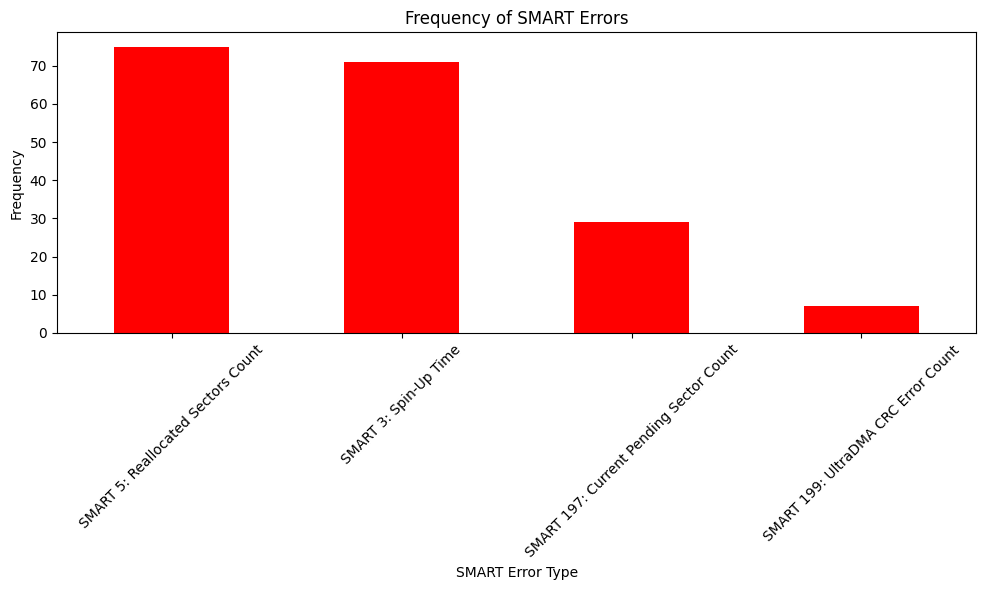

In [74]:
import matplotlib.pyplot as plt

# Flatten the DataFrame to count occurrences of each issue
issue_counts = issues_expanded_df.melt(var_name='SMART Error', value_name='Status').dropna()
issue_counts = issue_counts['SMART Error'].value_counts()

# Plotting the SMART error counts as a bar chart
plt.figure(figsize=(10, 6))
issue_counts.plot(kind='bar', color='red')
plt.title('Frequency of SMART Errors')
plt.xlabel('SMART Error Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
